In [1]:
import pandas as pd
import numpy as np
import pyodbc
import gc
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
pd.options.display.max_rows=500
pd.options.display.precision=2
pd.options.display.max_columns=50
pd.options.display.float_format='{0:,.2f}'.format

In [2]:
%%time
t_sql="Select INVENTTABLE.ITEMID, INVENTTABLE.DIMENSION, INVENTTABLE.ITEMNAME, INVENTTABLE.ITEMGROUPID, VENDINVOICETRANS.INVOICEID, VENDINVOICETRANS.INVOICEDATE, VENDINVOICETRANS.CURRENCYCODE, VENDINVOICETRANS.LINEAMOUNT, VENDINVOICETRANS.INVENTQTY, INVENTTABLE.DATAAREAID, VENDINVOICETRANS.LINEAMOUNTMST From INVENTTABLE Inner Join VENDINVOICETRANS On VENDINVOICETRANS.ITEMID = INVENTTABLE.ITEMID And VENDINVOICETRANS.DATAAREAID = INVENTTABLE.DATAAREAID Where (INVENTTABLE.ITEMGROUPID = 'SUR' Or INVENTTABLE.ITEMGROUPID = 'TOW' Or INVENTTABLE.ITEMGROUPID = 'OPA' Or INVENTTABLE.ITEMGROUPID = 'MPO' Or INVENTTABLE.ITEMGROUPID = 'USK' Or INVENTTABLE.ITEMGROUPID = 'PFK' Or INVENTTABLE.ITEMGROUPID = 'ODP') And VENDINVOICETRANS.INVOICEDATE >= '2021-01-01' And INVENTTABLE.DATAAREAID = 'prod' "

cnxn=pyodbc.connect('Driver={SQL Server};'
                    'Server=192.168.0.29\EUREKA;'
                    'Database=INCO_INT;'
                    'Trusted_Connection=yes;')

df=pd.read_sql_query (t_sql,cnxn)
df.to_csv(r"C:\Users\Daniel.Wojcik\Documents\FINANSE_2022_NEW\FAKTURY_2022\DATA\T_Surowce_Transakcje.csv",index=False)
del [df]
gc.collect()

Wall time: 2.6 s


0

In [3]:
t_surowce=pd.read_csv(r'C:\Users\Daniel.Wojcik\Documents\FINANSE_2022_NEW\FAKTURY_2022\DATA\T_Surowce_Transakcje.csv')
t_surowce['INVOICEDATE']=pd.to_datetime(t_surowce['INVOICEDATE'], infer_datetime_format=True)
t_surowce['M']=t_surowce['INVOICEDATE'].dt.month

t_surowce_agg=t_surowce.groupby(['ITEMID'],as_index=False).agg(Razem=('LINEAMOUNTMST','sum'))
t_surowce_agg=t_surowce_agg[t_surowce_agg['Razem']>=500000]
t_surowce=pd.merge(t_surowce,t_surowce_agg,how='inner',on=['ITEMID'])
t_surowce['C_PLN']=t_surowce['LINEAMOUNTMST']/t_surowce['INVENTQTY']
t_sur=t_surowce[(t_surowce['DIMENSION']=='GCG')&(t_surowce['ITEMGROUPID']=='SUR')].sort_values(['ITEMNAME', 'INVOICEDATE'], ascending=[True, True])
#t_sur.sort_values(['ITEMNAME', 'INVOICEDATE'], ascending=[True, True])

<Figure size 432x288 with 0 Axes>

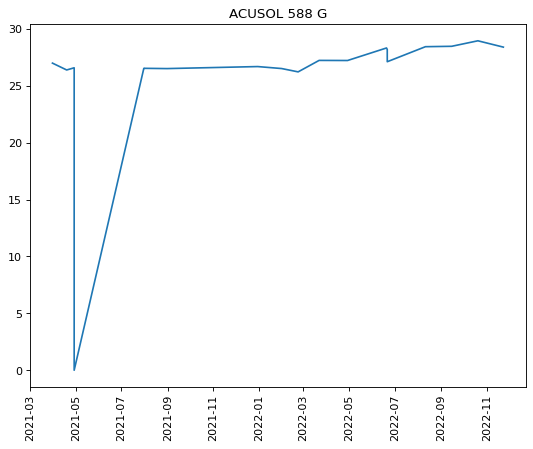

<Figure size 432x288 with 0 Axes>

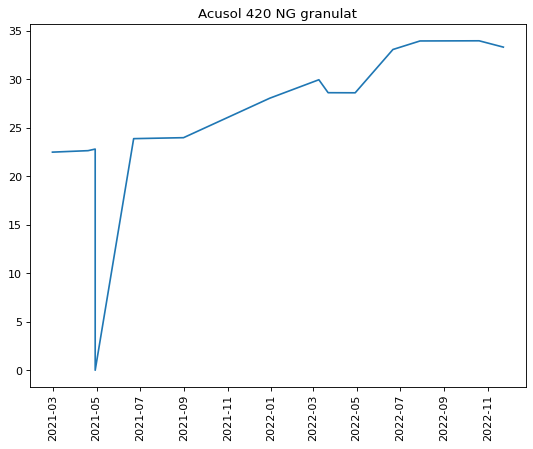

<Figure size 432x288 with 0 Axes>

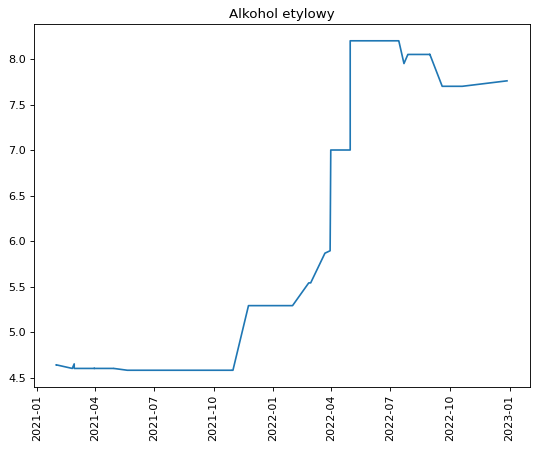

<Figure size 432x288 with 0 Axes>

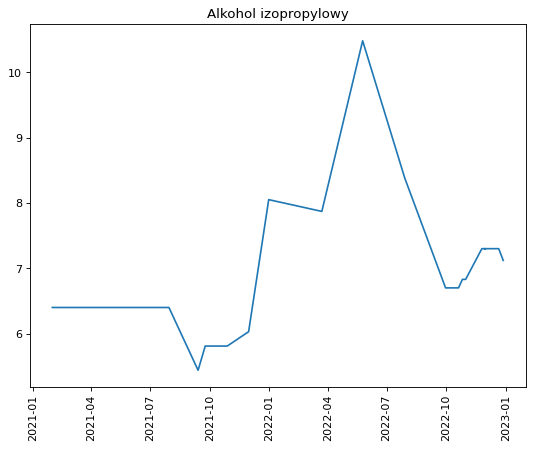

<Figure size 432x288 with 0 Axes>

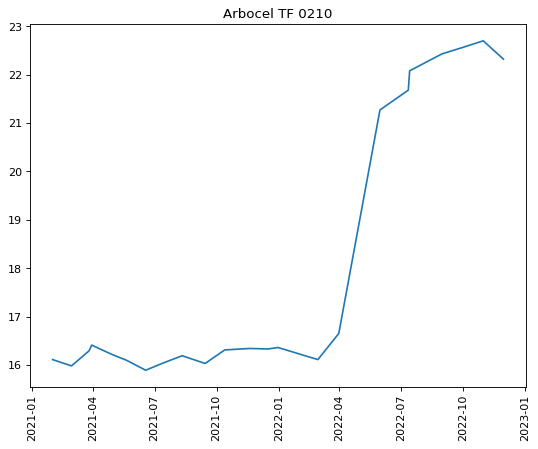

<Figure size 432x288 with 0 Axes>

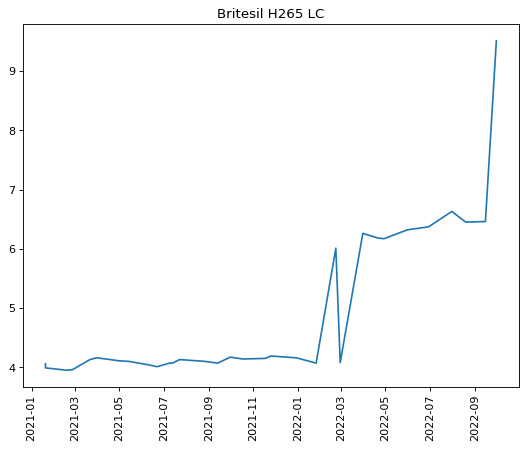

<Figure size 432x288 with 0 Axes>

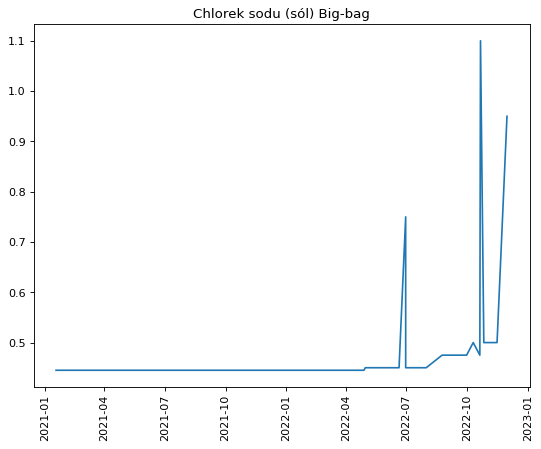

<Figure size 432x288 with 0 Axes>

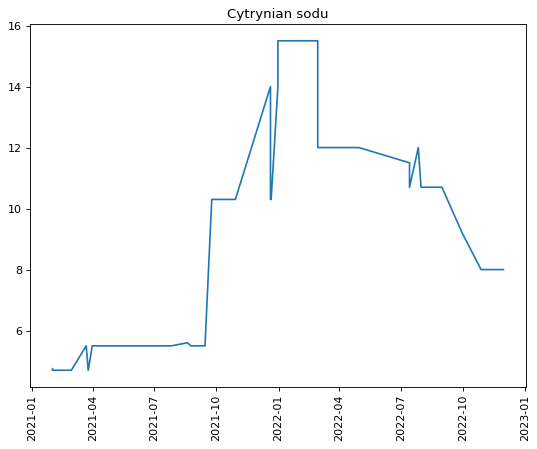

<Figure size 432x288 with 0 Axes>

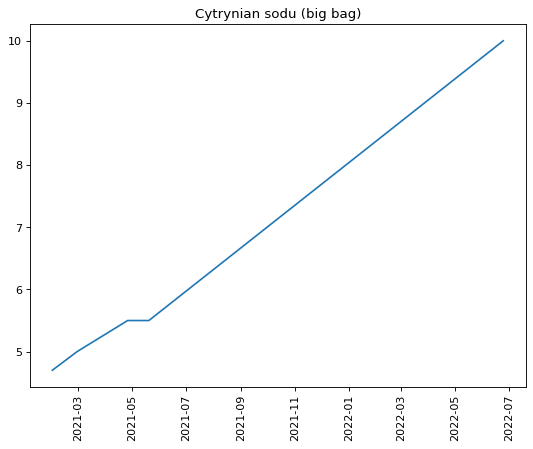

<Figure size 432x288 with 0 Axes>

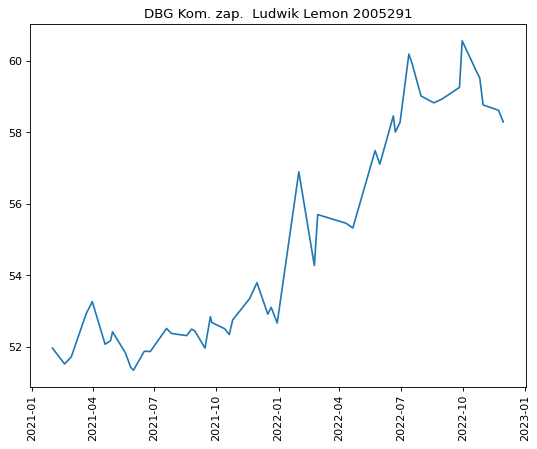

<Figure size 432x288 with 0 Axes>

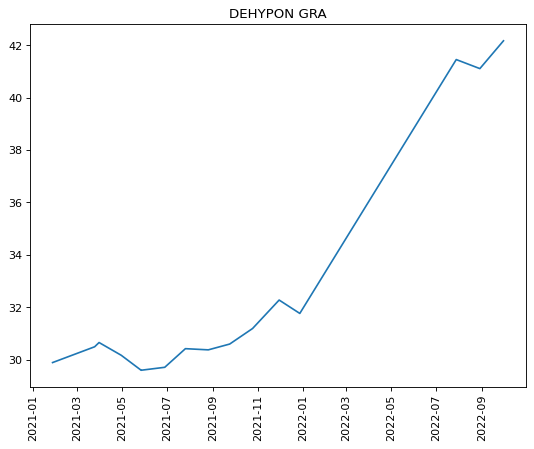

<Figure size 432x288 with 0 Axes>

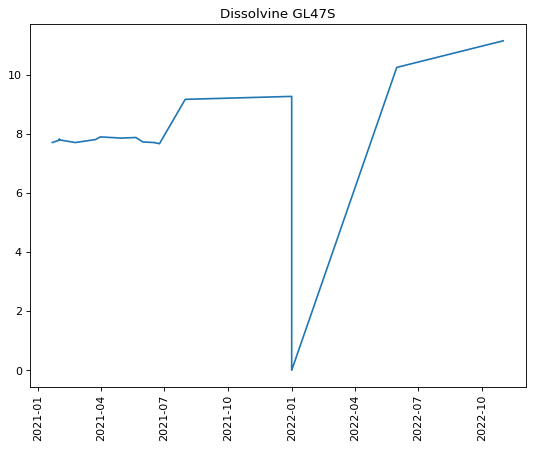

<Figure size 432x288 with 0 Axes>

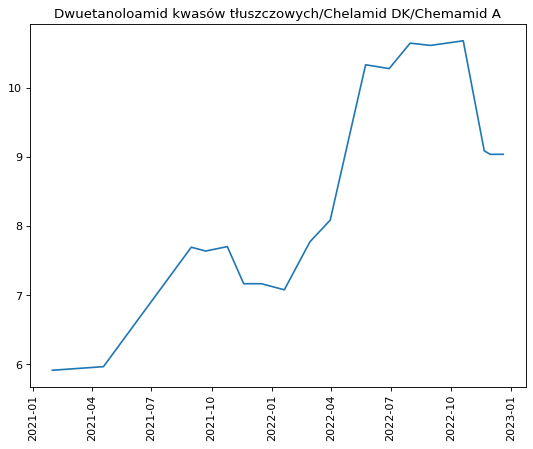

<Figure size 432x288 with 0 Axes>

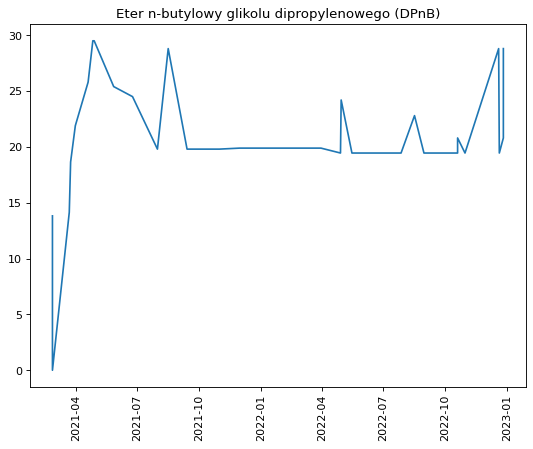

<Figure size 432x288 with 0 Axes>

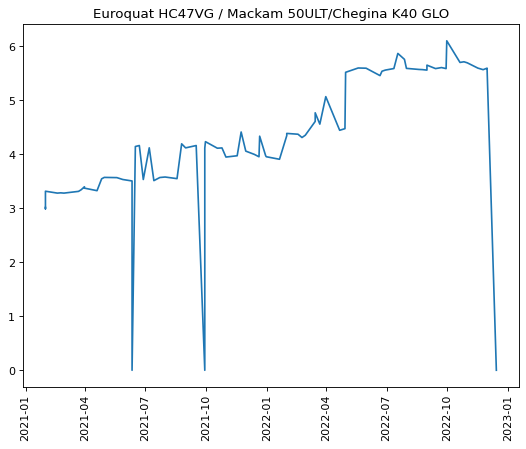

<Figure size 432x288 with 0 Axes>

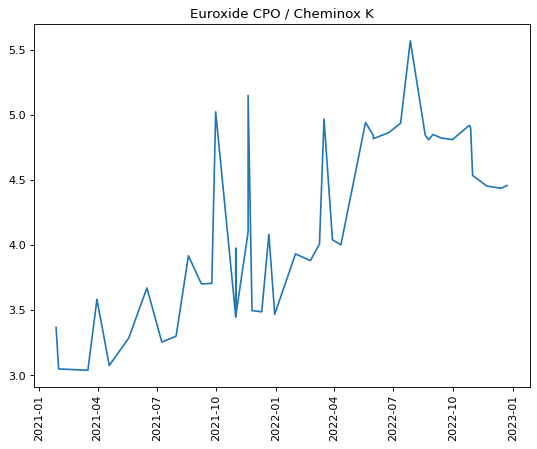

<Figure size 432x288 with 0 Axes>

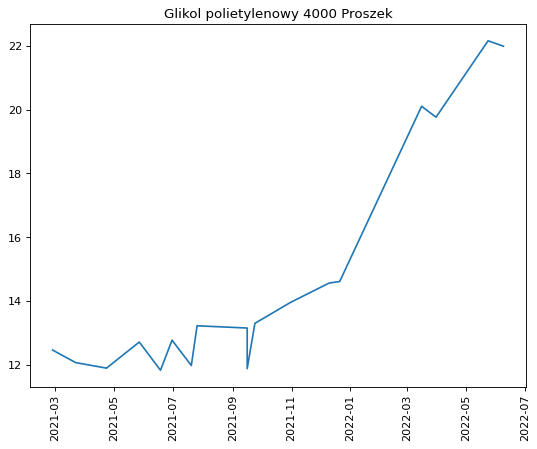

<Figure size 432x288 with 0 Axes>

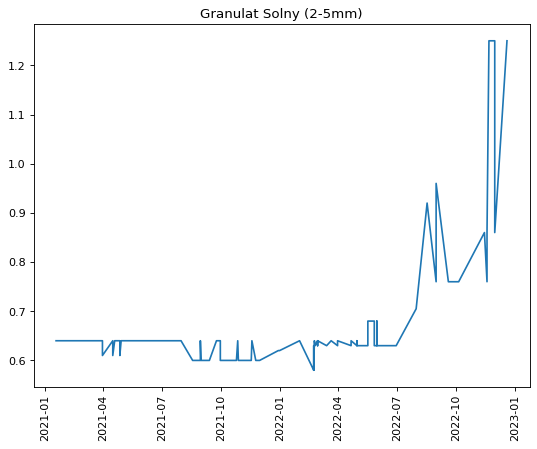

<Figure size 432x288 with 0 Axes>

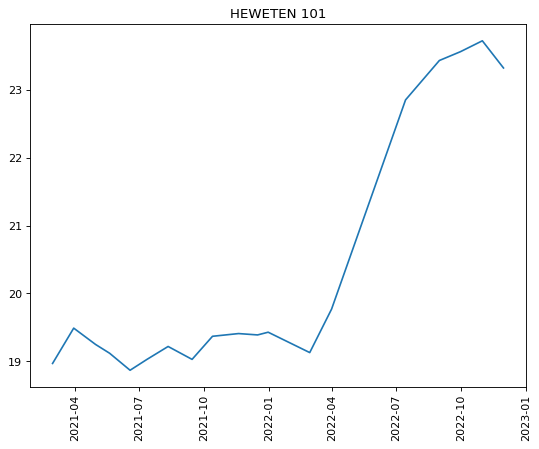

<Figure size 432x288 with 0 Axes>

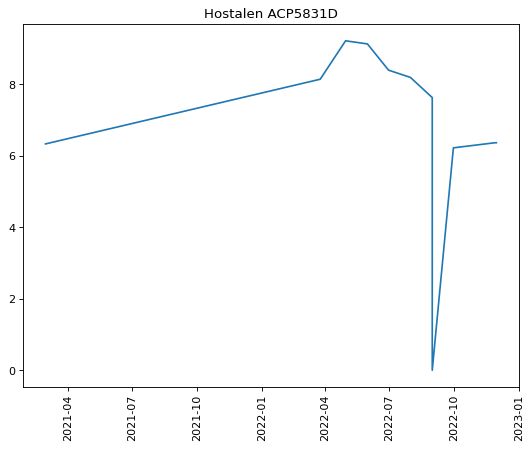

<Figure size 432x288 with 0 Axes>

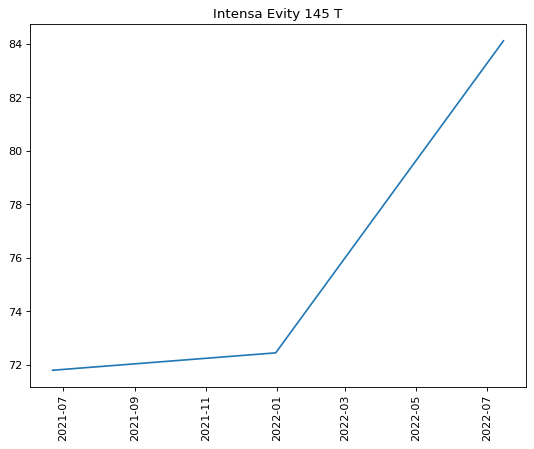

<Figure size 432x288 with 0 Axes>

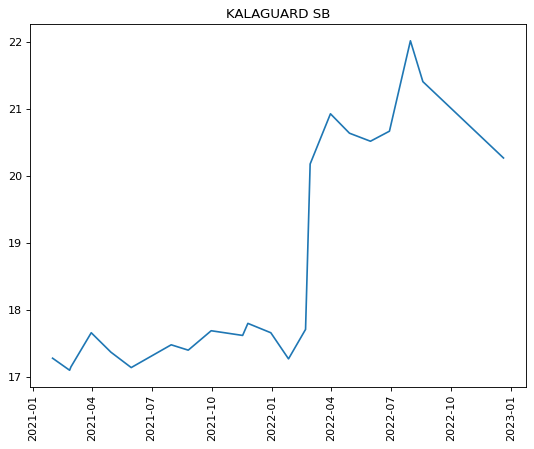

<Figure size 432x288 with 0 Axes>

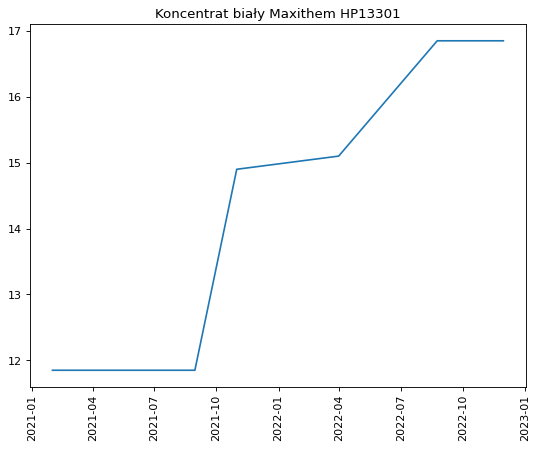

<Figure size 432x288 with 0 Axes>

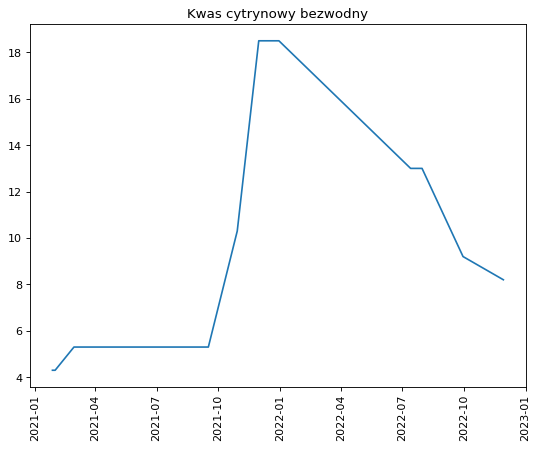

<Figure size 432x288 with 0 Axes>

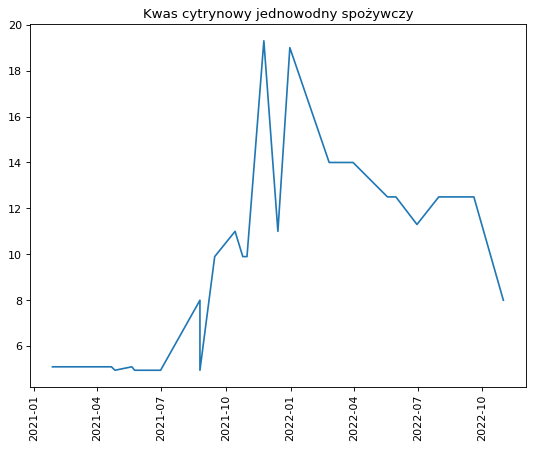

<Figure size 432x288 with 0 Axes>

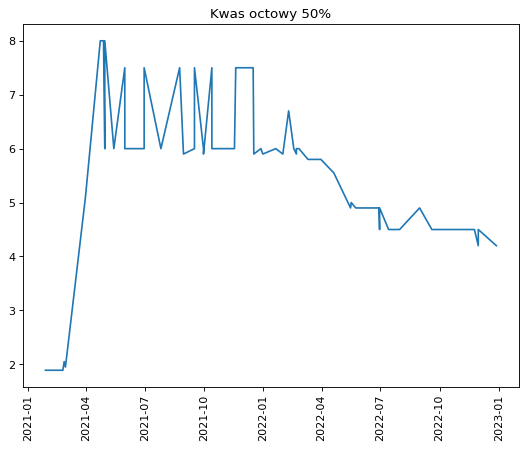

<Figure size 432x288 with 0 Axes>

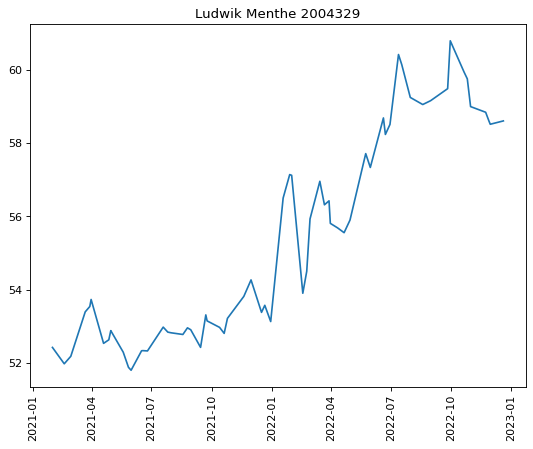

<Figure size 432x288 with 0 Axes>

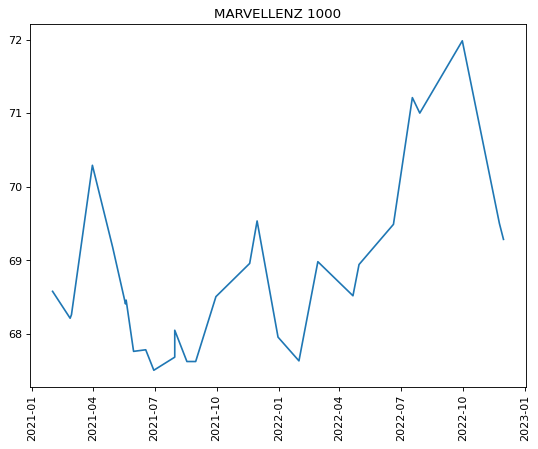

<Figure size 432x288 with 0 Axes>

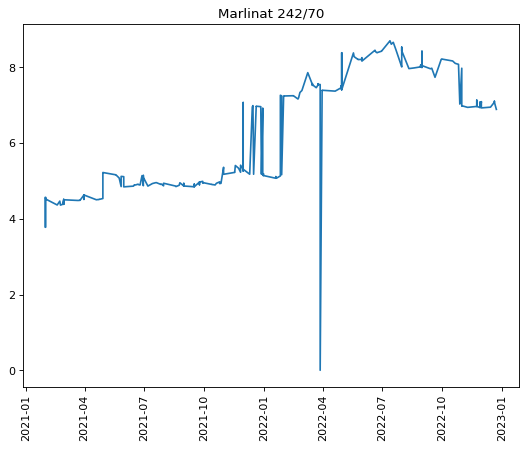

<Figure size 432x288 with 0 Axes>

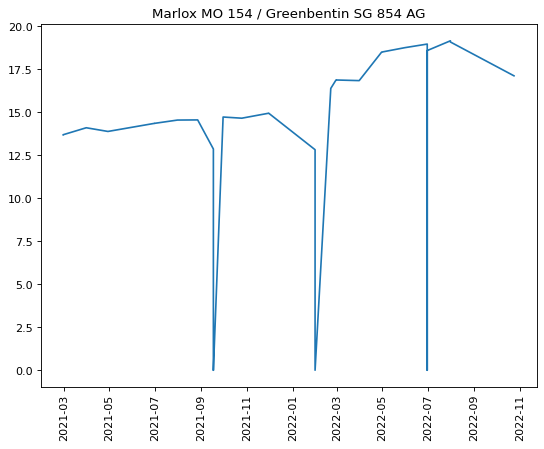

<Figure size 432x288 with 0 Axes>

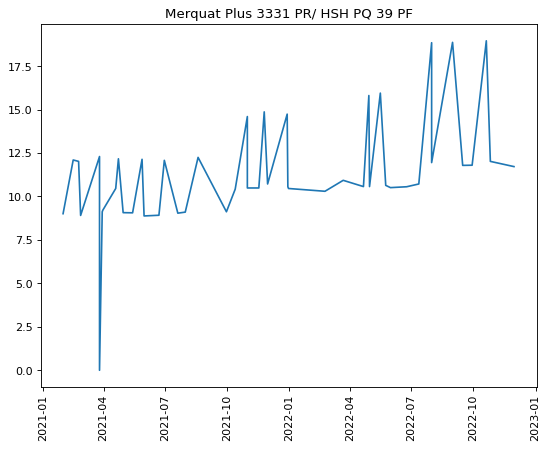

<Figure size 432x288 with 0 Axes>

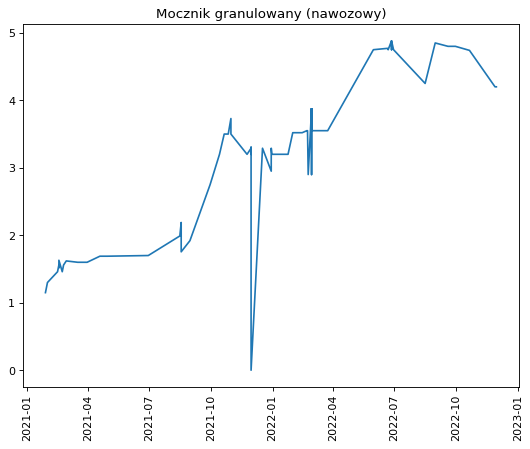

<Figure size 432x288 with 0 Axes>

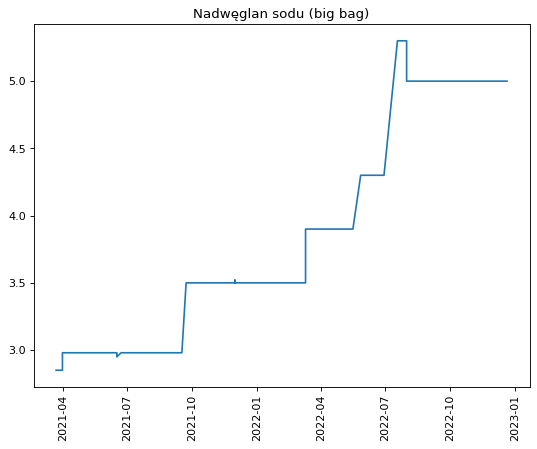

<Figure size 432x288 with 0 Axes>

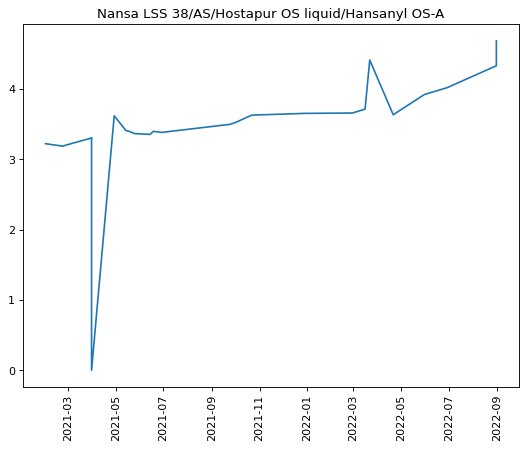

<Figure size 432x288 with 0 Axes>

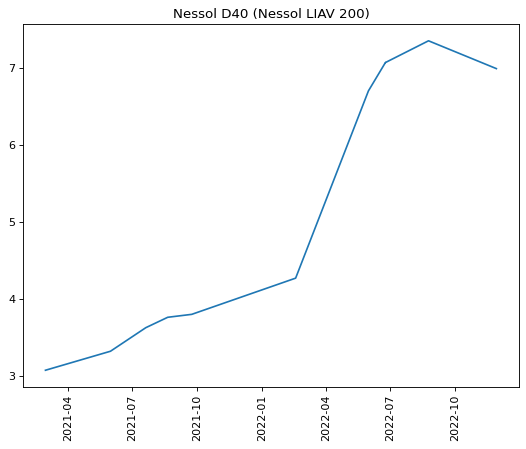

<Figure size 432x288 with 0 Axes>

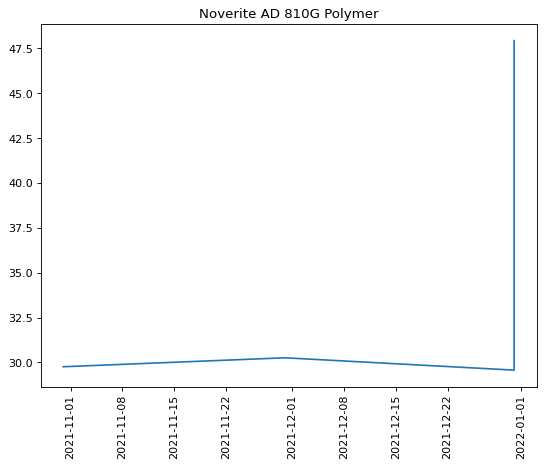

<Figure size 432x288 with 0 Axes>

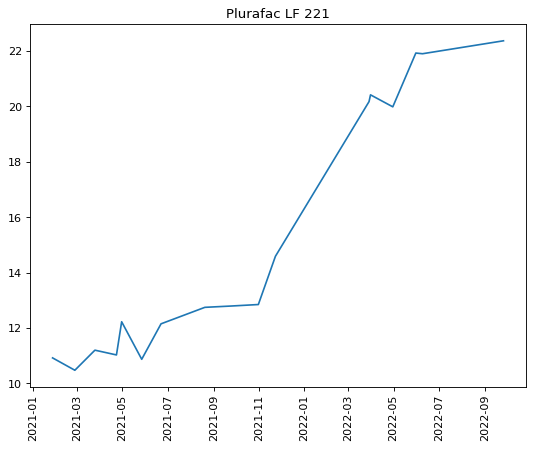

<Figure size 432x288 with 0 Axes>

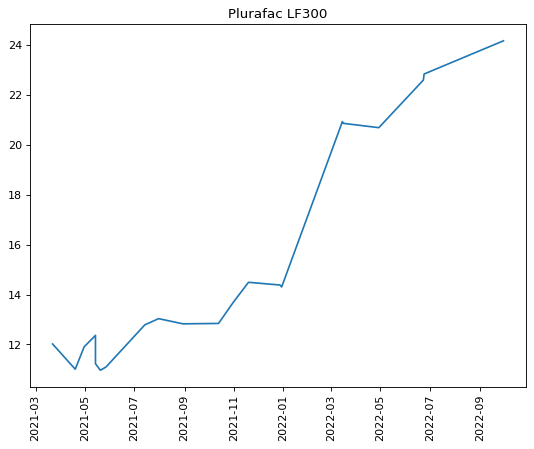

<Figure size 432x288 with 0 Axes>

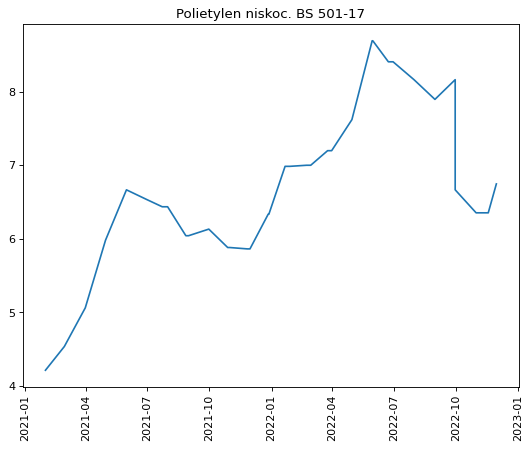

<Figure size 432x288 with 0 Axes>

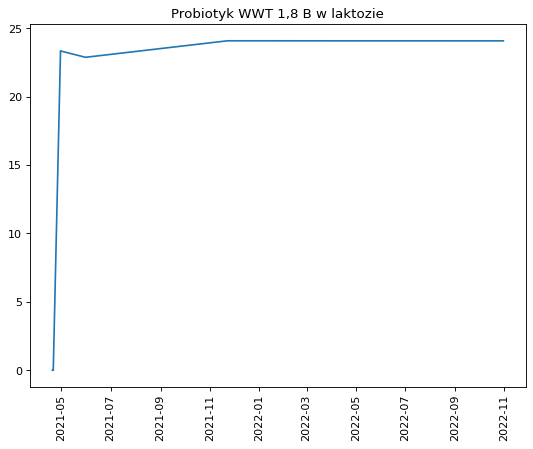

<Figure size 432x288 with 0 Axes>

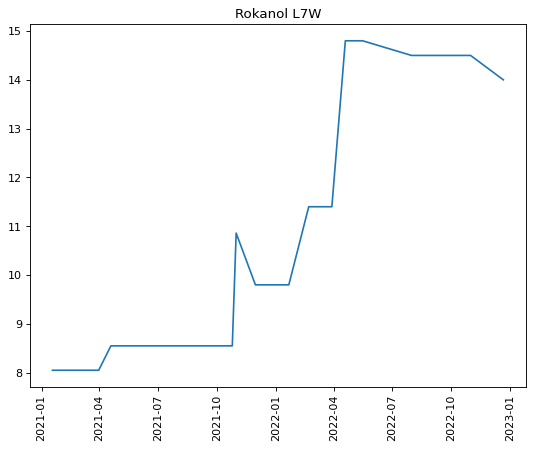

<Figure size 432x288 with 0 Axes>

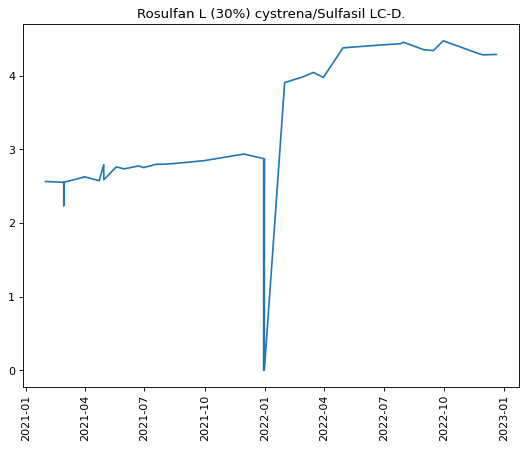

<Figure size 432x288 with 0 Axes>

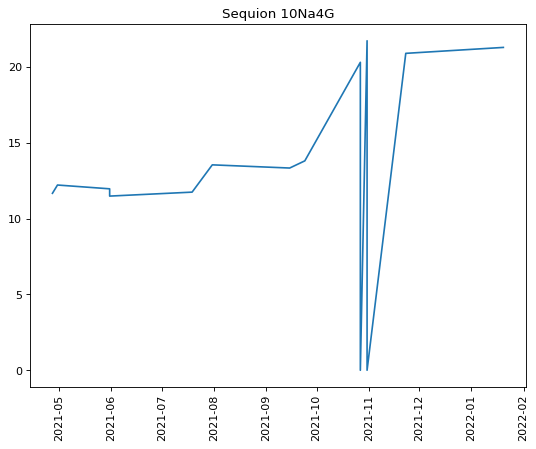

<Figure size 432x288 with 0 Axes>

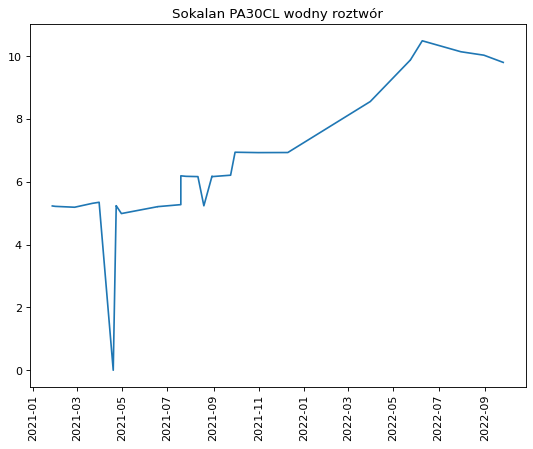

<Figure size 432x288 with 0 Axes>

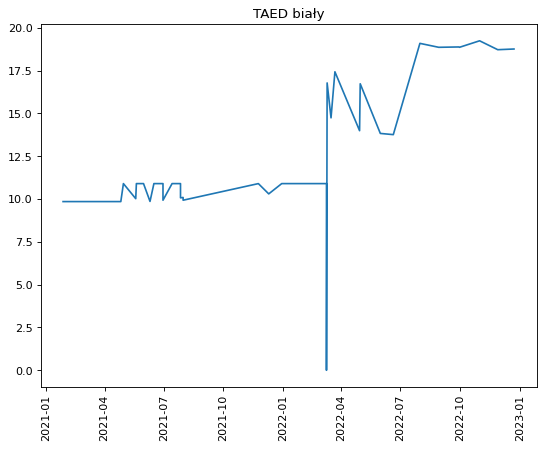

<Figure size 432x288 with 0 Axes>

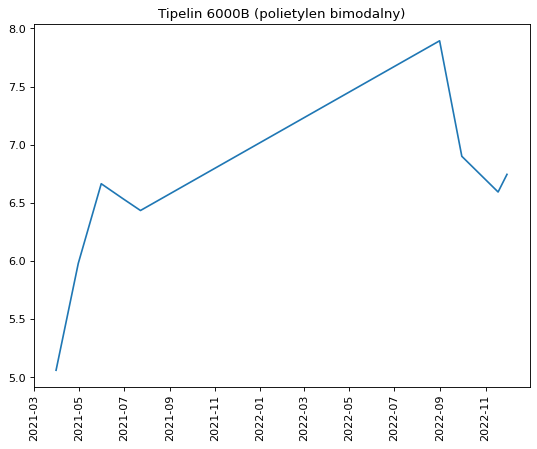

<Figure size 432x288 with 0 Axes>

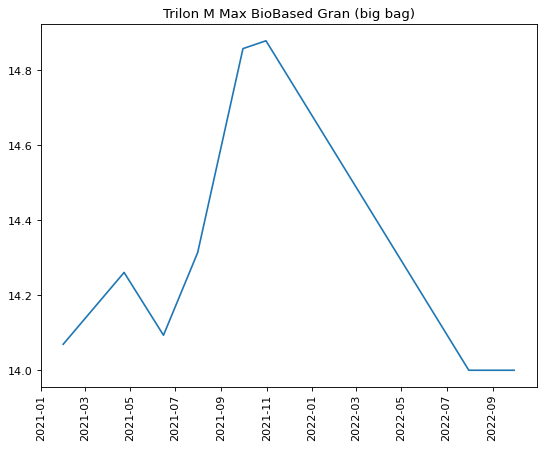

<Figure size 432x288 with 0 Axes>

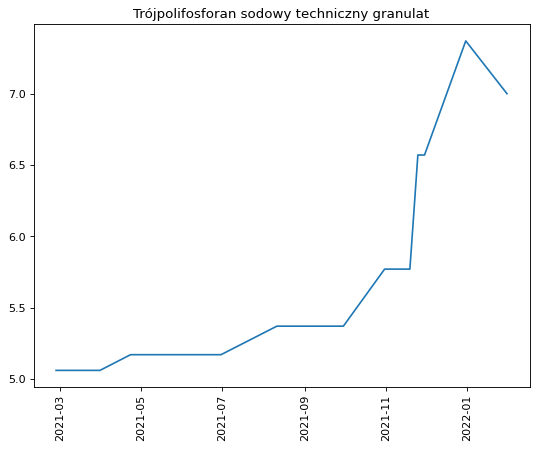

<Figure size 432x288 with 0 Axes>

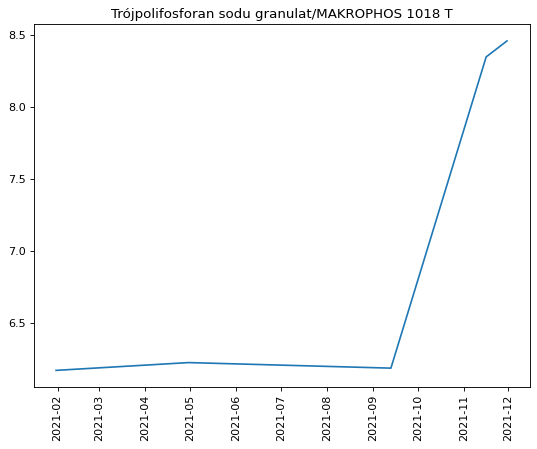

<Figure size 432x288 with 0 Axes>

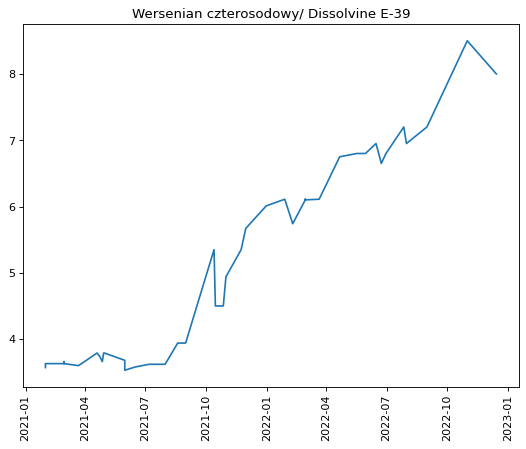

<Figure size 432x288 with 0 Axes>

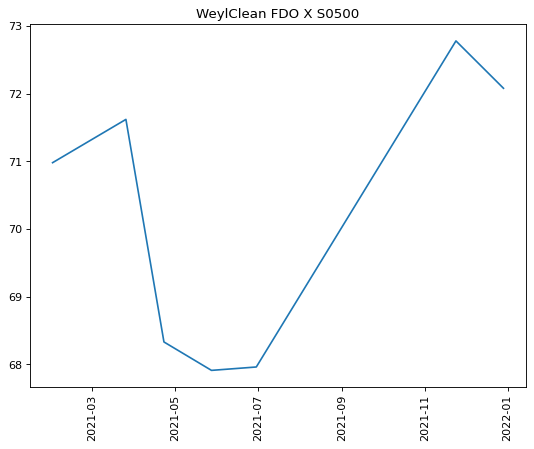

<Figure size 432x288 with 0 Axes>

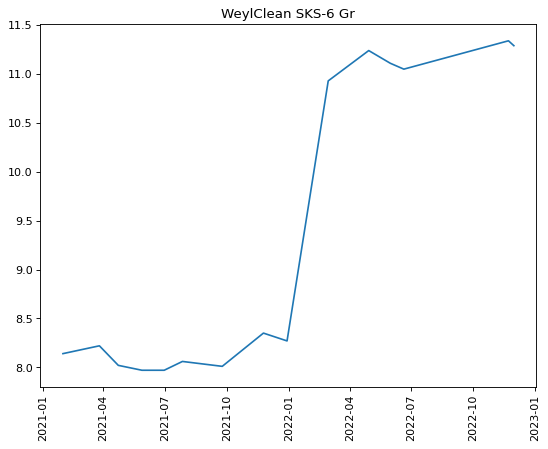

<Figure size 432x288 with 0 Axes>

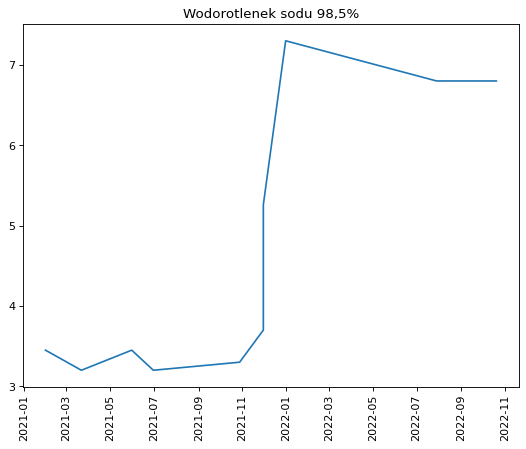

<Figure size 432x288 with 0 Axes>

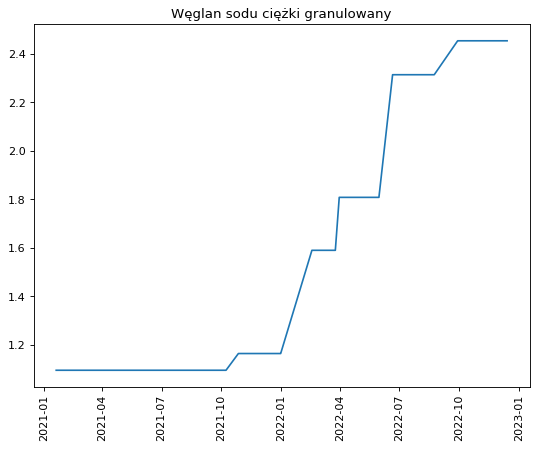

In [4]:
lista=t_sur['ITEMNAME'].unique()

for i in lista:
    t_sur_wykres=t_sur[t_sur['ITEMNAME']==i].sort_values(['INVOICEDATE'], ascending=[True])
    #t_sur_wykres['PCG']=t_sur_wykres['C_PLN'].pct_change().cumsum()
    
    plt.figure()
    figure(figsize=(8, 6), dpi=80)
    plt.xticks(rotation=90)
    plt.plot(
        t_sur_wykres['INVOICEDATE'],
        t_sur_wykres['C_PLN'])
    plt.title(i)
    plt.show()
    
    #plt.figure()
    #figure(figsize=(8, 6), dpi=80)
    #plt.xticks(rotation=90)
    #plt.plot(
     #   t_sur_wykres['INVOICEDATE'],
      #  t_sur_wykres['PCG'])
    #plt.title(i)
    #plt.show()
